<a href="https://colab.research.google.com/github/hasibzunair/learn-pytorch/blob/master/intro/Tutorial1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 1
Adapted from [https://pytorch.org/tutorials/beginner/basics/intro.html](https://pytorch.org/tutorials/beginner/basics/intro.html)

In [1]:
%matplotlib inline


`Learn the Basics <intro.html>`_ ||
**Quickstart** || 
`Tensors <tensorqs_tutorial.html>`_ || 
`Datasets & DataLoaders <data_tutorial.html>`_ ||
`Transforms <transforms_tutorial.html>`_ ||
`Build Model <buildmodel_tutorial.html>`_ ||
`Autograd <autogradqs_tutorial.html>`_ ||
`Optimization <optimization_tutorial.html>`_ ||
`Save & Load Model <saveloadrun_tutorial.html>`_

Quickstart
===================
This section runs through the API for common tasks in machine learning. Refer to the links in each section to dive deeper.

Working with data
-----------------
PyTorch has two `primitives to work with data <https://pytorch.org/docs/stable/data.html>`_: 
``torch.utils.data.DataLoader`` and ``torch.utils.data.Dataset``.
``Dataset`` stores the samples and their corresponding labels, and ``DataLoader`` wraps an iterable around
the ``Dataset``.




In [2]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt
import numpy as np

PyTorch offers domain-specific libraries such as `TorchText <https://pytorch.org/text/stable/index.html>`_, 
`TorchVision <https://pytorch.org/vision/stable/index.html>`_, and `TorchAudio <https://pytorch.org/audio/stable/index.html>`_, 
all of which include datasets. For this tutorial, we  will be using a TorchVision dataset.

The ``torchvision.datasets`` module contains ``Dataset`` objects for many real-world vision data like 
CIFAR, COCO (`full list here <https://pytorch.org/docs/stable/torchvision/datasets.html>`_). In this tutorial, we
use the FashionMNIST dataset. Every TorchVision ``Dataset`` includes two arguments: ``transform`` and
``target_transform`` to modify the samples and labels respectively.



In [3]:
# transform -> to modify input feature(i.e. iamages)
# target_transform -> to modify input label(i.e. mask)

# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(), 
)

# ToTensor() converts PIL or numpy array of shape (H x W x C) to 
# torch.FloatTensor of shape (C x H x W) in the range [0.0, 1.0]

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw




Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw




Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw




Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [7]:
print(training_data)
print("\n")
print(test_data)

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()


Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


We pass the ``Dataset`` as an argument to ``DataLoader``. This wraps an iterable over our dataset, and supports
automatic batching, sampling, shuffling and multiprocess data loading. Here we define a batch size of 64, i.e. each element 
in the dataloader iterable will return a batch of 64 features and labels.



In [8]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print("Shape of X [N, C, H, W]: ", X.shape)
    print("Shape of y: ", y.shape, y.dtype)
    break

Shape of X [N, C, H, W]:  torch.Size([64, 1, 28, 28])
Shape of y:  torch.Size([64]) torch.int64


Read more about `loading data in PyTorch <data_tutorial.html>`_.




--------------




Creating Models
------------------
To define a neural network in PyTorch, we create a class that inherits 
from `nn.Module <https://pytorch.org/docs/stable/generated/torch.nn.Module.html>`_. We define the layers of the network
in the ``__init__`` function and specify how data will pass through the network in the ``forward`` function. To accelerate 
operations in the neural network, we move it to the GPU if available.



In [9]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512), # 28*28 = H*W of input image
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x) # can use softmax here
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cuda device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
)


Read more about `building neural networks in PyTorch <buildmodel_tutorial.html>`_.




--------------




Optimizing the Model Parameters
----------------------------------------
To train a model, we need a `loss function <https://pytorch.org/docs/stable/nn.html#loss-functions>`_
and an `optimizer <https://pytorch.org/docs/stable/optim.html>`_. 



In [10]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In a single training loop, the model makes predictions on the training dataset (fed to it in batches), and 
backpropagates the prediction error to adjust the model's parameters. 



In [11]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    train_loss, correct = 0, 0
    # Iterate over the dataset 
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        
        # Forward pass
        pred = model(X)
        # Compute loss
        loss = loss_fn(pred, y)

        train_loss += loss.item()
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()
        
        # Clear gradients, stop them from piling up
        optimizer.zero_grad()
        # Backpropagation
        loss.backward()
        # Update parameters
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

    # Loss and accuracy over the whole dataset
    train_loss /= size
    correct /= size
    print(f"Train Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {train_loss:>8f} \n")

We also check the model's performance against the test dataset to ensure it is learning.



In [12]:
def test(dataloader, model):
    size = len(dataloader.dataset)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    # Loss and accuracy over the whole dataset
    test_loss /= size
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

The training process is conducted over several iterations (*epochs*). During each epoch, the model learns 
parameters to make better predictions. We print the model's accuracy and loss at each epoch; we'd like to see the
accuracy increase and the loss decrease with every epoch.



In [13]:
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model)
print("Done!")

Epoch 1
-------------------------------
loss: 2.298468  [    0/60000]
loss: 2.294141  [ 6400/60000]
loss: 2.287315  [12800/60000]
loss: 2.286578  [19200/60000]
loss: 2.275212  [25600/60000]
loss: 2.260239  [32000/60000]
loss: 2.265357  [38400/60000]
loss: 2.260415  [44800/60000]
loss: 2.258528  [51200/60000]
loss: 2.209333  [57600/60000]
Train Error: 
 Accuracy: 25.2%, Avg loss: 0.035504 

Test Error: 
 Accuracy: 26.9%, Avg loss: 0.035169 

Epoch 2
-------------------------------
loss: 2.248232  [    0/60000]
loss: 2.241872  [ 6400/60000]
loss: 2.222990  [12800/60000]
loss: 2.231793  [19200/60000]
loss: 2.190500  [25600/60000]
loss: 2.173321  [32000/60000]
loss: 2.195796  [38400/60000]
loss: 2.184016  [44800/60000]
loss: 2.194622  [51200/60000]
loss: 2.085867  [57600/60000]
Train Error: 
 Accuracy: 26.9%, Avg loss: 0.034419 

Test Error: 
 Accuracy: 26.2%, Avg loss: 0.033855 

Epoch 3
-------------------------------
loss: 2.175890  [    0/60000]
loss: 2.160400  [ 6400/60000]
loss: 2.12

Read more about `Training your model <optimization_tutorial.html>`_.




--------------




Saving Models
-------------
A common way to save a model is to serialize the internal state dictionary (containing the model parameters).



In [14]:
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


Loading Models
----------------------------

The process for loading a model includes re-creating the model structure and loading
the state dictionary into it. 



In [15]:
model = NeuralNetwork()
model.load_state_dict(torch.load("model.pth"))

<All keys matched successfully>

This model can now be used to make predictions.



Predicted: "Ankle boot", Actual: "Ankle boot"


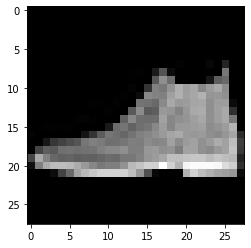

Predicted: "Coat", Actual: "Pullover"


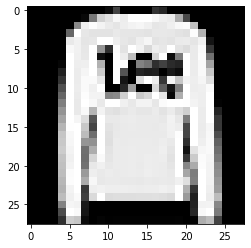

Predicted: "Bag", Actual: "Trouser"


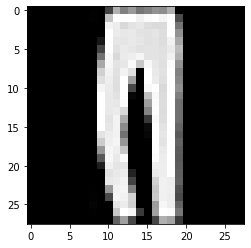

Predicted: "Bag", Actual: "Trouser"


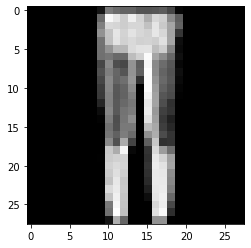

Predicted: "Shirt", Actual: "Shirt"


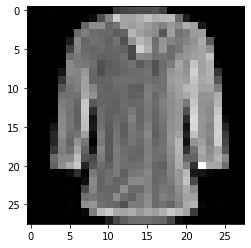

Predicted: "Coat", Actual: "Trouser"


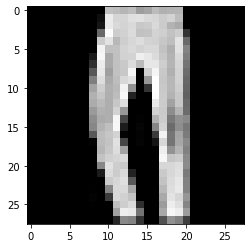

Predicted: "Coat", Actual: "Coat"


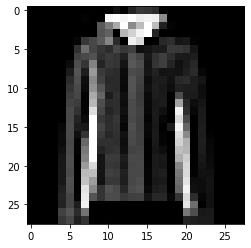

Predicted: "Coat", Actual: "Shirt"


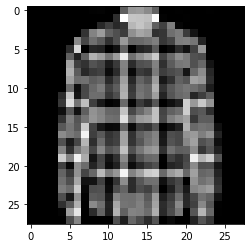

Predicted: "Sneaker", Actual: "Sandal"


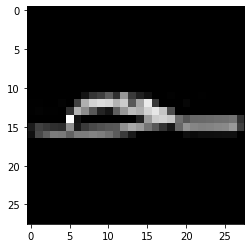

Predicted: "Sneaker", Actual: "Sneaker"


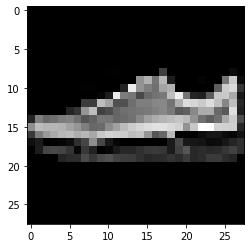

In [16]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]


model.eval()

for idx in range(10):
  x, y = test_data[idx][0], test_data[idx][1]
  with torch.no_grad():
      pred = model(x)
      predicted, actual = classes[pred[0].argmax(0)], classes[y]
      #print(f'Raw scorers from model: "{pred[0]}"')
      print(f'Predicted: "{predicted}", Actual: "{actual}"')
      img = np.squeeze(x.numpy()) # change to W,H
      plt.imshow(img,cmap='gray')
      plt.show()

Read more about `Saving & Loading your model <saveloadrun_tutorial.html>`_.


